# What is feature engineering ?


---
Feature scaling is like giving your features a makeover. You want them to look good and feel good, so they can impress the machine learning model.

 - Process of extracting features (characteristics, properties, attributes) from raw data.

Some features in the dataset might have huge values that make other features look like tiny ants. We want to treat all features equally and give them a fair chance to contribute to the model. That's why we use feature scaling techniques.
Most common scaling techniques are -
 - Standardization
 - Normalization

---
## Standardization 

Standardization, also known as z-score normalization or feature scaling, is a technique used in data preprocessing to transform a dataset so that it has a **mean of $0$** and a **standard deviation of $1$** .

This way, the features can coexist peacefully and harmoniously, without any domination or oppression.

Standardization is typically applied to each feature (column) of your dataset separately.

This is done by subtracting the mean from each data point and then dividing by the standard deviation.

\begin{equation}
Z = \frac{X - \mu}{\sigma}
\end{equation}

 - $Z$ is the standardized value.
 - $X$ is the original value.
 - $\mu$ is the mean (average) of the feature.
 - $\sigma$ is the standard deviation of the feature.

Required for
 - K-Means
 - K-nn
 - PCA
 - Gredient Discent
  - Neural Network

Optional for
 - Decession Tree
 - Random Forest

### Get data and explore

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'https://gist.githubusercontent.com/meftaul/b247134207633c4de2e1c80209be36ce/raw/4e6f57b3d6b3eb3ce7fbca7955a654ac3e0e65e8/Social_Network_Ads.csv'

df = pd.read_csv(url)
df.sample(5)

,Age,EstimatedSalary,Purchased
293,37,77000,0
385,56,60000,1
128,30,17000,0
399,49,36000,1
195,34,43000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


### Split data before doing any analysis

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# train_test_split?
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Purchased', axis=1),
    df['Purchased'],
    test_size=0.3,
    random_state=0
)

In [7]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(280, 2) (280,)
(120, 2) (120,)


In [8]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,280.0,37.864286,10.218201,18.0,30.0,37.0,46.0,60.0
EstimatedSalary,280.0,69807.142857,34641.201654,15000.0,43000.0,70500.0,88000.0,150000.0


### Plot the distributions of the features

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

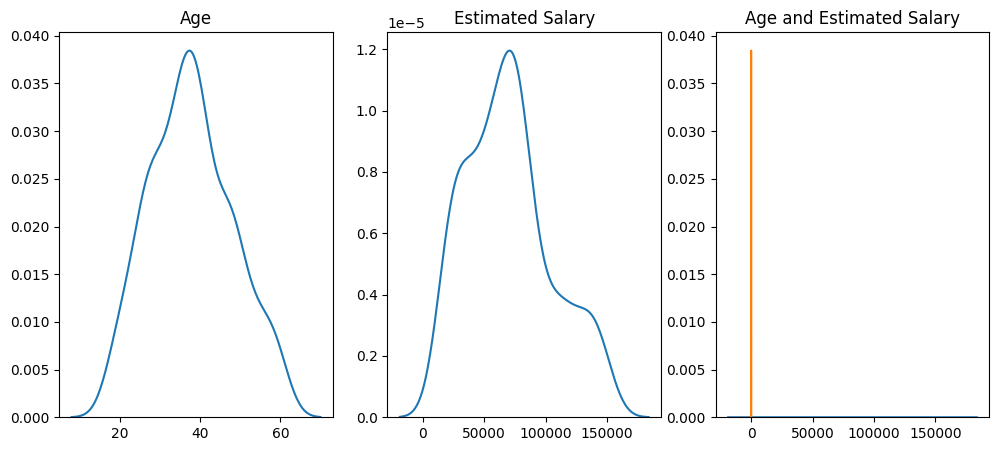

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

ax1.set_title('Age')
# ax1.hist((X_train['Age'])
sns.kdeplot(X_train['Age'], ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('')

ax2.set_title('Estimated Salary')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')

ax3.set_title('Age and Estimated Salary')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax3)
sns.kdeplot(X_train['Age'], ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('')

plt.show()

### Apply Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Initialize
scaler = StandardScaler()
scaler?

Type:        StandardScaler
String form: StandardScaler()
File:        /mnt/data/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/preprocessing/_data.py
Docstring:  
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.

Centering and scaling happen independently on each feature by computing
the relevant statistics on the samples in the training set. Mean and
standard deviation are then stored to be used on later data using
:meth:`transform`.

Standardization of a dataset is a common requirement for many
machine learning estimators: they might behave badly if the
individual features do not more or less look like standard normally
distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in

In [13]:
# Fit only on train data
scaler.fit(X_train)

StandardScaler()

In [14]:
print(scaler.mean_)
print(scaler.var_)

[3.78642857e+01 6.98071429e+04]
[1.04038724e+02 1.19572709e+09]


In [15]:
# Transform on train test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled.shape, X_test_scaled.shape

((280, 2), (120, 2))

In [17]:
type(X_train_scaled)

numpy.ndarray

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [19]:
X_train_scaled.sample(5)

,Age,EstimatedSalary
149,-0.476894,-0.283613
35,-1.751411,0.352606
199,-1.163172,-1.556051
184,-1.359252,-1.353618
237,-1.163172,-1.093347


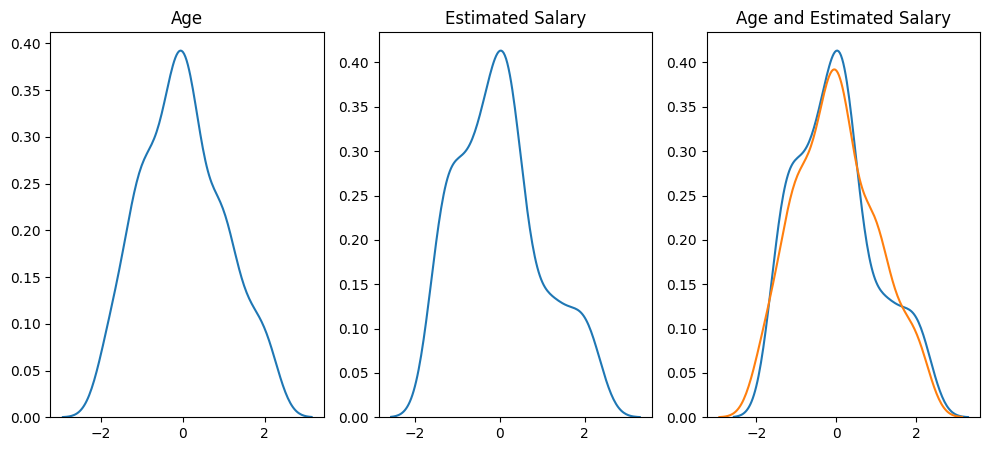

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

ax1.set_title('Age')
# ax1.hist((X_train['Age'])
sns.kdeplot(X_train_scaled['Age'], ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('')

ax2.set_title('Estimated Salary')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')

ax3.set_title('Age and Estimated Salary')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax3)
sns.kdeplot(X_train_scaled['Age'], ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('')

plt.show()

### Effect of scaling

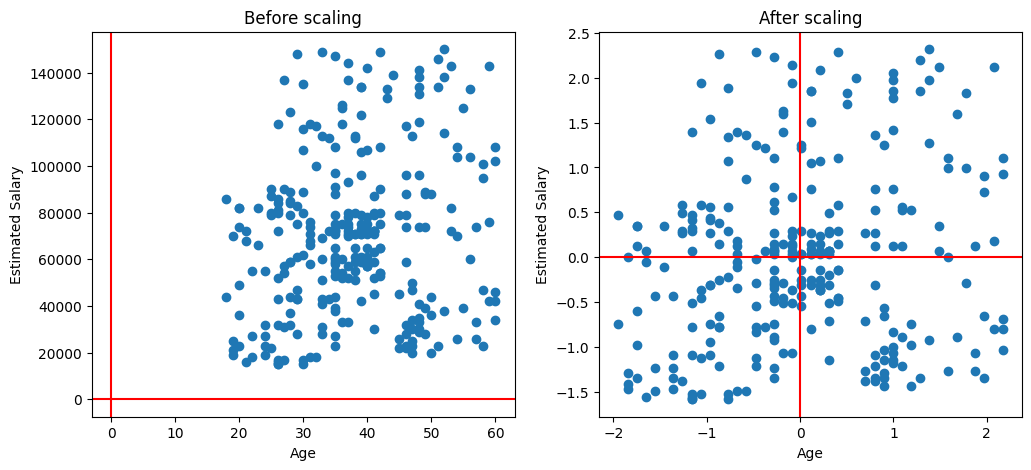

In [21]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'])
ax2.set_title('After scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')

ax1.axvline(x=0, c="red", label="x=0")
ax1.axhline(y=0, c="red", label="y=0")

ax2.axvline(x=0, c="red", label="x=0")
ax2.axhline(y=0, c="red", label="y=0")

plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)


In [24]:
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


--- 

## Normalization  

#### **Min-Max** Normalization



 - Min-Max normalization
 - Mean normalization
 - Robust normalization
 - Max-absolute normalization

\begin{equation}
X_{i-scaled} = \frac{X_i - X_{min} }{X_{max} - X_{min}}
\end{equation}

 - $X_{i}$ is the original feature value.
 - $X_{min}$ is the minimum value of the feature.
 - $X_{max}$ is the maximum value of the feature.

Benefits of normalization:

 - Normalization makes data more comparable, even if the data comes from different sources with different units of measurement.
 - Normalization can improve the performance of machine learning algorithms.
 - Normalization can help to identify outliers in the data.



#### Get and explore data

In [25]:
# Source: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
wine_quality_data_url = 'https://gist.githubusercontent.com/meftaul/6a23f63172d6dbbc66546ee2f0bdf911/raw/665d6c24145d47d6a457d132208ea96b0205781d/winequality-red.csv'

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv(wine_quality_data_url)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
29,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,6
176,7.3,0.380,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5
934,6.6,0.610,0.01,1.9,0.080,8.0,25.0,0.99746,3.69,0.73,10.5,5
363,12.5,0.460,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2,5
965,8.3,0.340,0.40,2.4,0.065,24.0,48.0,0.99554,3.34,0.86,11.0,6


In [28]:
df = data[['alcohol', 'chlorides', 'quality']]
df.sample(5)

,alcohol,chlorides,quality
1018,12.7,0.049,6
1576,10.8,0.081,6
1017,12.7,0.049,6
799,10.7,0.082,6
764,9.5,0.093,6


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,1599.0,10.422983,1.065668,8.400,9.50,10.200,11.10,14.900
chlorides,1599.0,0.087467,0.047065,0.012,0.07,0.079,0.09,0.611
quality,1599.0,5.636023,0.807569,3.000,5.00,6.000,6.00,8.000


#### Split data before any analysis 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('quality', axis=1),
    df['quality'],
    test_size=0.3,
    random_state=0
)

In [32]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1119, 2) (1119,)
(480, 2) (480,)


#### Visualize data distributions 

In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns

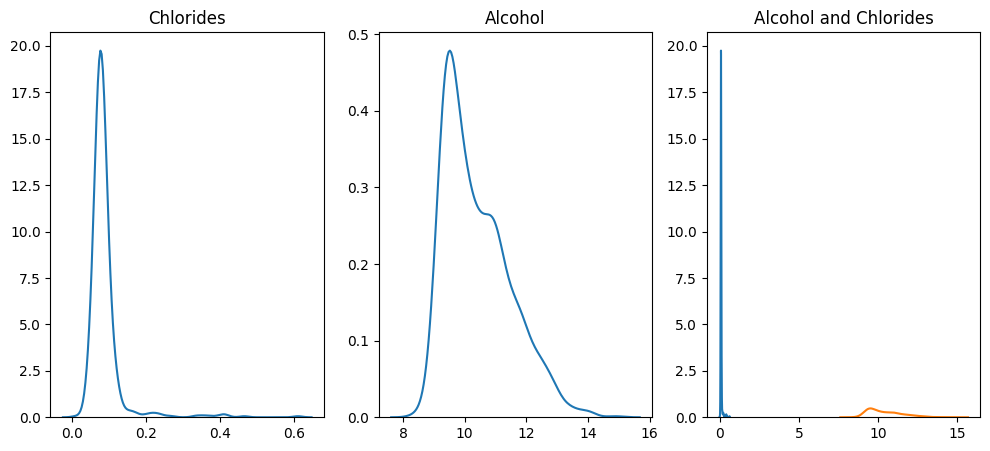

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

ax1.set_title('Chlorides')
sns.kdeplot(X_train['chlorides'], ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('')

ax2.set_title('Alcohol')
sns.kdeplot(X_train['alcohol'], ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')

ax3.set_title('Alcohol and Chlorides')
sns.kdeplot(X_train['chlorides'], ax=ax3)
sns.kdeplot(X_train['alcohol'], ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('')

plt.show()

#### Apply MinMaxScaler 

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [37]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [39]:
X_train.describe().T 

,count,mean,std,min,25%,50%,75%,max
alcohol,1119.0,10.409920,1.064800,8.400,9.50,10.100,11.033333,14.900
chlorides,1119.0,0.087685,0.049581,0.012,0.07,0.079,0.090000,0.611


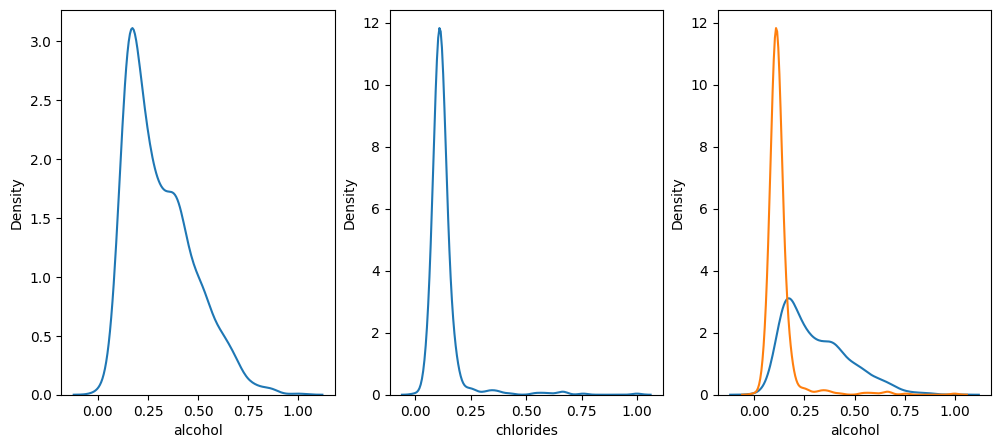

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

sns.kdeplot(X_train_scaled['alcohol'], ax=ax1)
sns.kdeplot(X_train_scaled['chlorides'], ax=ax2)

sns.kdeplot(X_train_scaled['alcohol'], ax=ax3)
sns.kdeplot(X_train_scaled['chlorides'], ax=ax3)

plt.show()

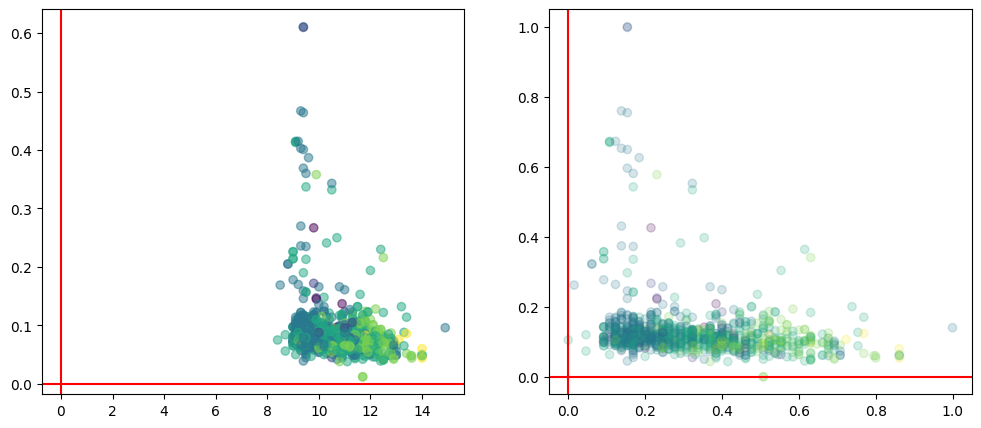

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)

ax1.scatter(X_train['alcohol'], X_train['chlorides'], c=y_train, alpha=0.5)
ax2.scatter(X_train_scaled['alcohol'], X_train_scaled['chlorides'], c=y_train, alpha=0.2)

# For explantion
ax1.axvline(x=0, c="red", label="x=0")
ax1.axhline(y=0, c="red", label="y=0")

ax2.axvline(x=0, c="red", label="x=0")
ax2.axhline(y=0, c="red", label="y=0")

plt.show()

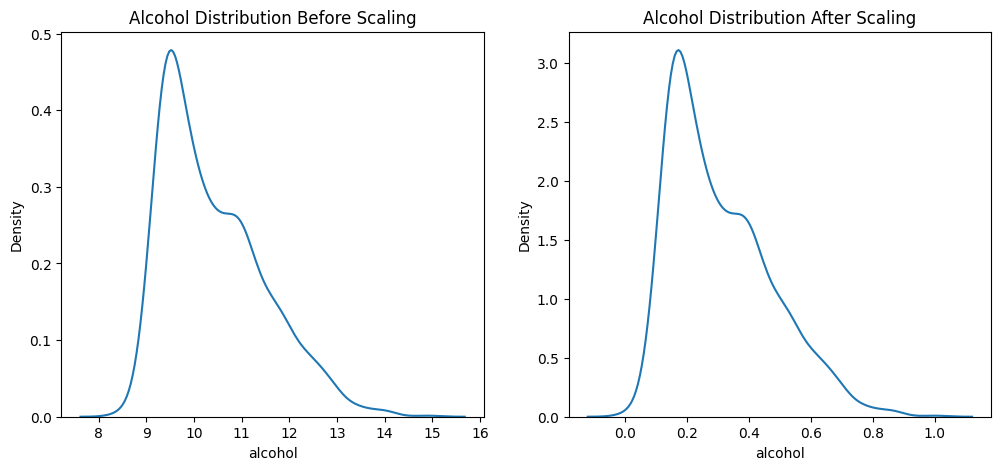

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Scaling')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)
plt.show()

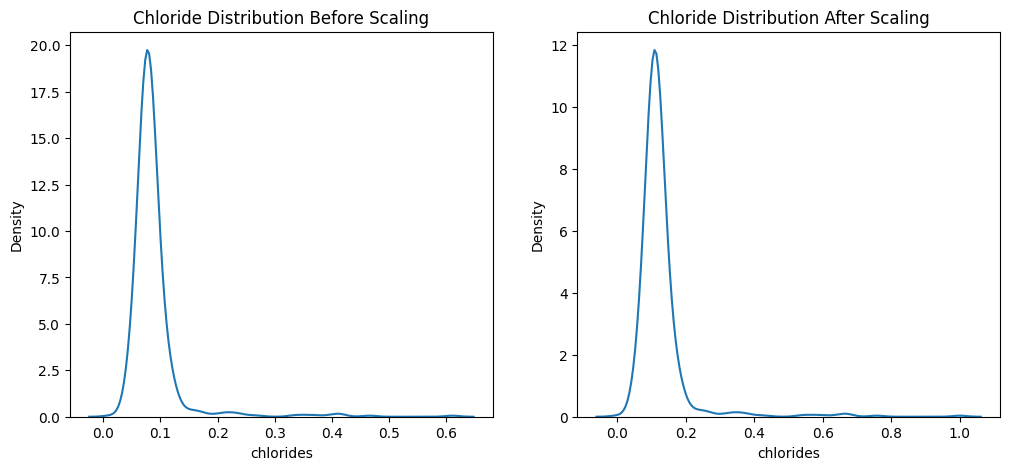

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Chloride Distribution Before Scaling')
sns.kdeplot(X_train['chlorides'], ax=ax1)

# after scaling
ax2.set_title('Chloride Distribution After Scaling')
sns.kdeplot(X_train_scaled['chlorides'], ax=ax2)
plt.show()

### **Robust**Scaler


---


\begin{equation}
X_{i-scaled} = \frac{X_i - X_{median} }{IQR}
\end{equation}

Scales features using statistics that are robust to outliers. This method removes the median and scales the data according to the interquartile range (IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

RobustScaler is a good choice for machine learning algorithms that are sensitive to outliers. It is also a good choice for datasets with a large number of outliers, as it is less likely to be affected by them.

Here are some of the benefits of using RobustScaler:

 - It is robust to outliers, which means that it is not affected by extreme values in the data.
 - It is simple to use and implement.
 - It is computationally efficient.

Examples of machine learning algorithms that are sensitive to outliers include:

 - K-nearest neighbors (KNN)
 - Support vector machines (SVMs)
 - Linear regression
 - Logistic regression


In [44]:
from IPython.display import display
import numpy as np 
import pandas as pd 

In [45]:
data = np.random.normal(0, 15, 30)
df = pd.DataFrame({'data': data})
df.describe().T

,count,mean,std,min,25%,50%,75%,max
data,30.0,1.794924,16.679606,-24.705525,-12.083435,0.801472,14.400296,41.236694


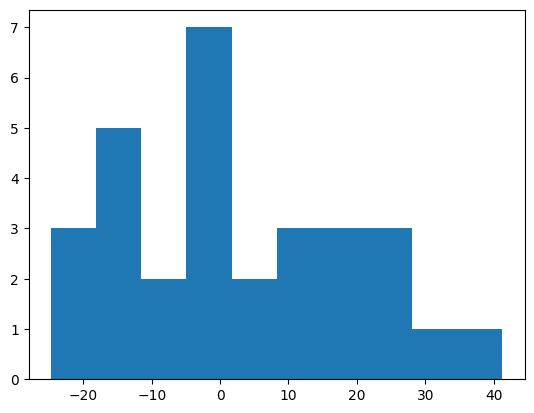

In [46]:
plt.hist(df)
plt.show()

In [47]:
# 5 outliers ranging from 240 to 250
outliers = np.random.uniform(240, 250, 5)
data_df = pd.DataFrame({
    "data": np.append(data, outliers)
})

In [48]:
display(data_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
data,35.0,36.305089,87.142914,-24.705525,-9.161892,1.950667,21.537917,246.121448


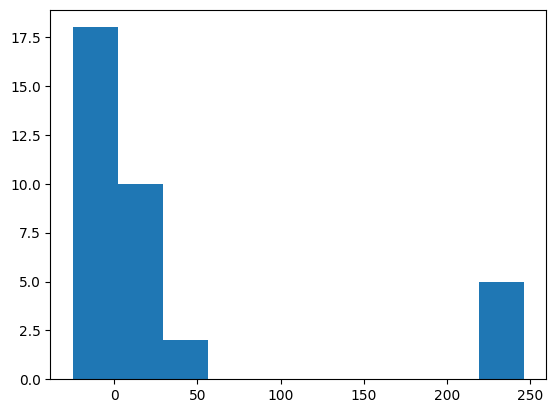

In [49]:
plt.hist(data_df)
plt.show()

In [50]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

# calculate median and IQR  
robust_scaler.fit(data_df)

# scale all data points using median and IQR
robust_scaled_data = robust_scaler.transform(data_df)

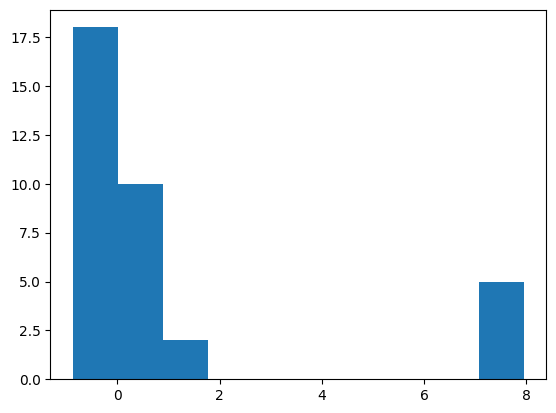

In [51]:
plt.hist(robust_scaled_data)
plt.show()


\begin{equation}
X_{i-scaled} = \frac{X_i}{ | X_{max} | }
\end{equation}

## Power Transformer


intro 

In [52]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [53]:
concrete_data_url = 'https://gist.githubusercontent.com/meftaul/9886dfcef566c1e03c69ef13076ce6c0/raw/dd0faec26d461b4beff36de6b00040c9d2c12857/concrete_data.csv'

In [54]:
concrete_data = pd.read_csv(concrete_data_url)
concrete_data.sample(5)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
868,276.0,116.0,90.0,180.0,9.0,870.0,768.0,28,44.28
925,164.0,163.0,128.0,197.0,8.0,961.0,641.0,28,27.23
963,150.0,236.8,0.0,173.8,11.9,1069.3,674.8,28,37.43
446,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,56,53.72
348,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,100,50.08


In [55]:
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
blast_furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
concrete_compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [56]:
concrete_data.shape 

(1030, 9)

In [57]:
concrete_data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [58]:
X = concrete_data.drop(
    columns=['concrete_compressive_strength'], 
    axis=1
)
y = concrete_data['concrete_compressive_strength']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [62]:
lr = LinearRegression()
# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6369606518338298

In [63]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.46099404916628606

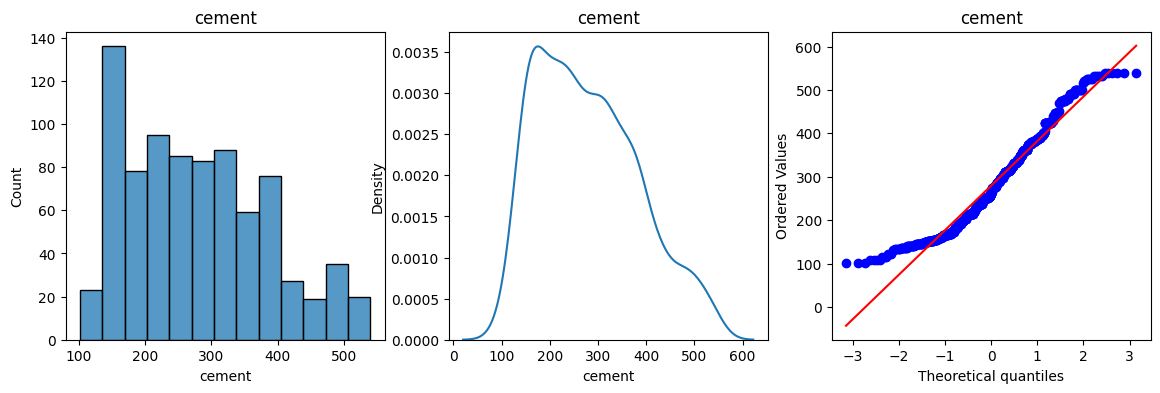

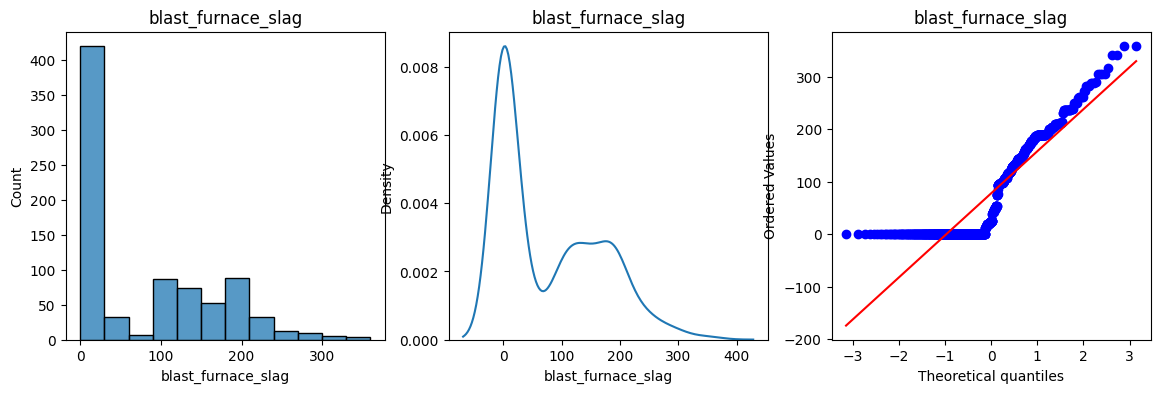

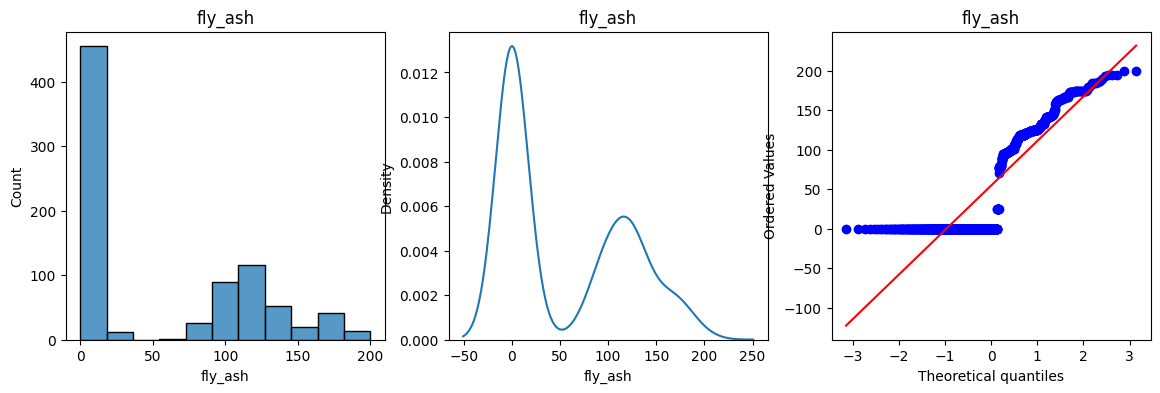

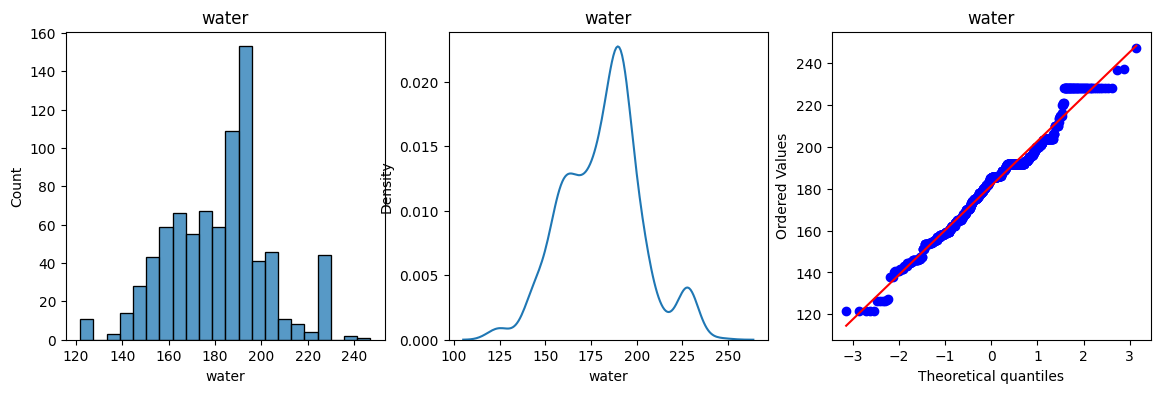

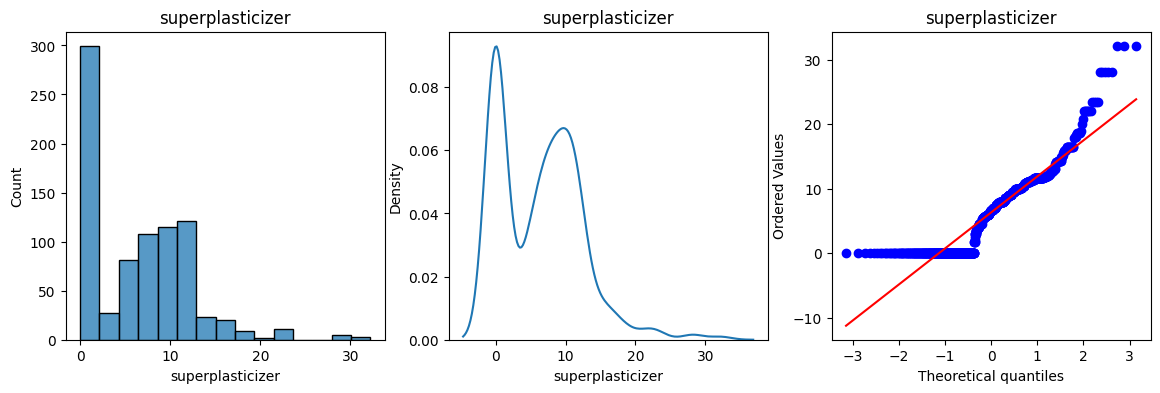

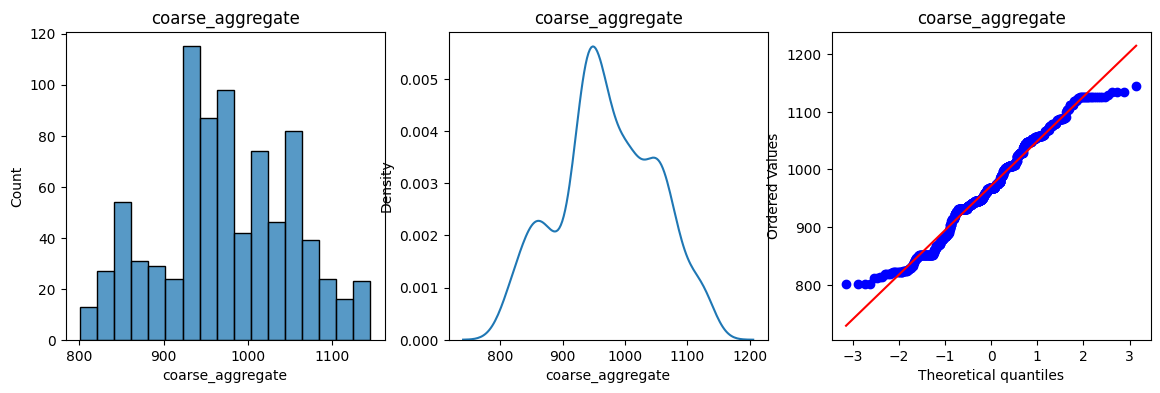

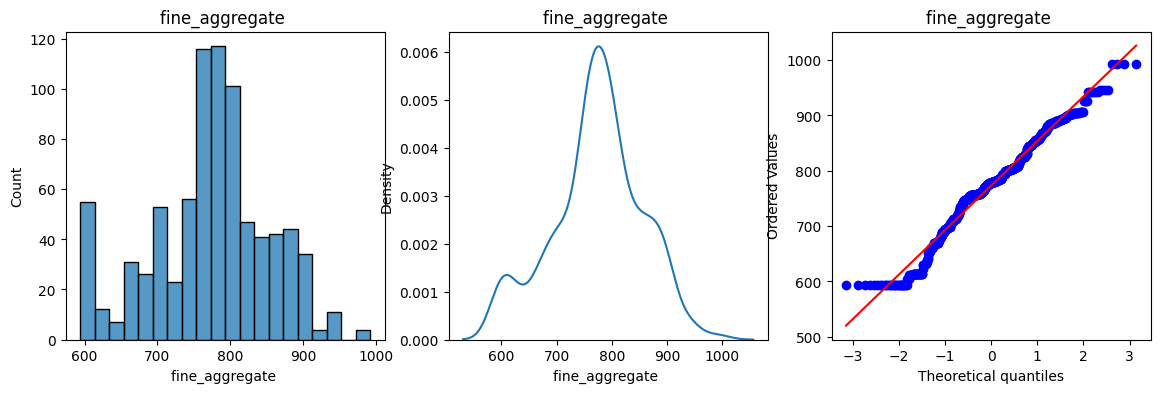

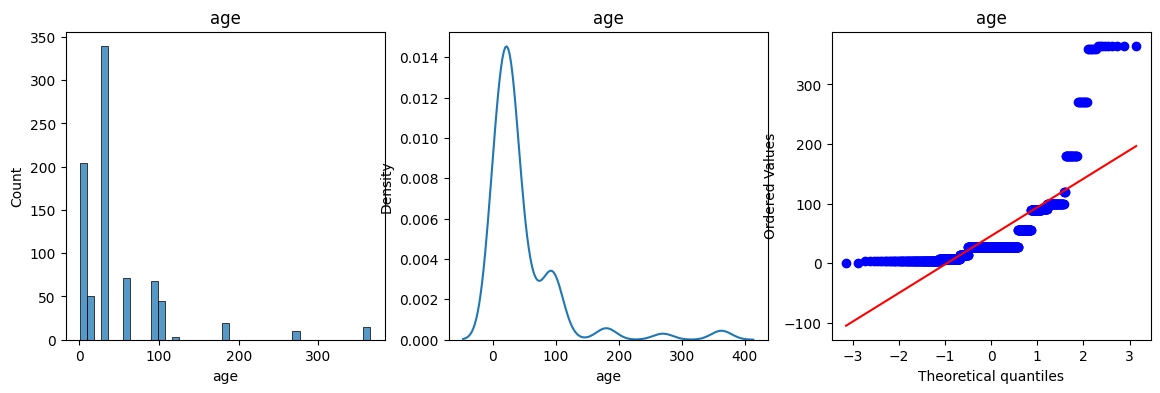

In [64]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.histplot(X_train[col])
    plt.title(col)

    plt.subplot(132)
    sns.kdeplot(X_train[col])
    plt.title(col)

    plt.subplot(133)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

### Box-cox transformation 

In [65]:
from sklearn.preprocessing import PowerTransformer

# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,cement,0.153049
1,blast_furnace_slag,0.031295
2,fly_ash,-0.034123
3,water,0.888072
4,superplasticizer,0.108879
5,coarse_aggregate,1.115681
6,fine_aggregate,1.789591
7,age,0.063010


In [66]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8134350083882319

In [67]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537942219863

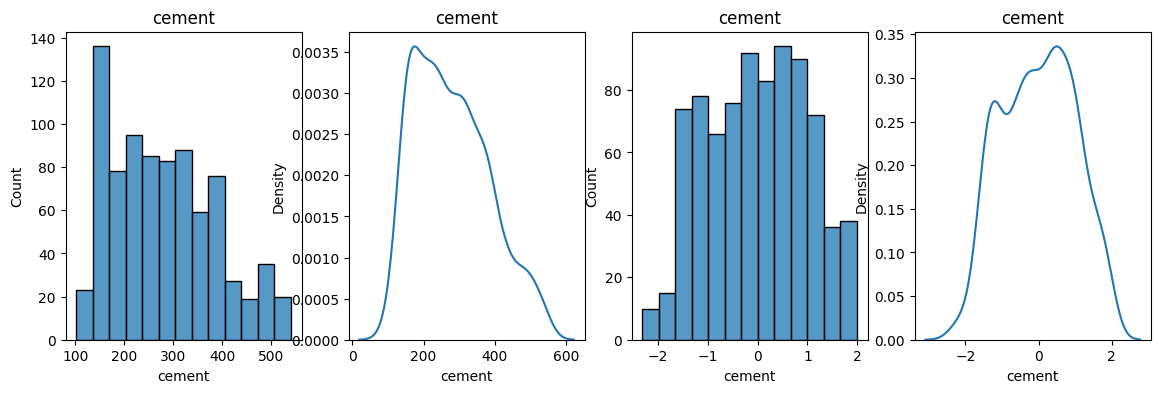

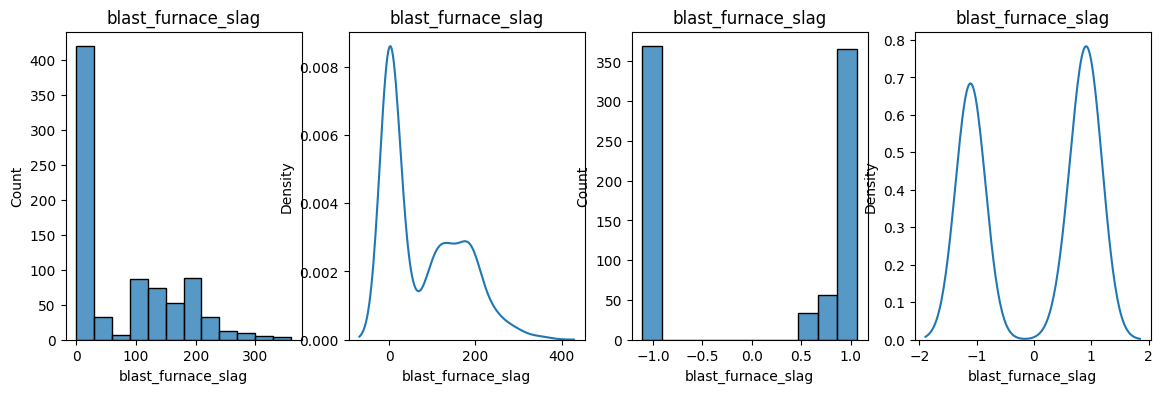

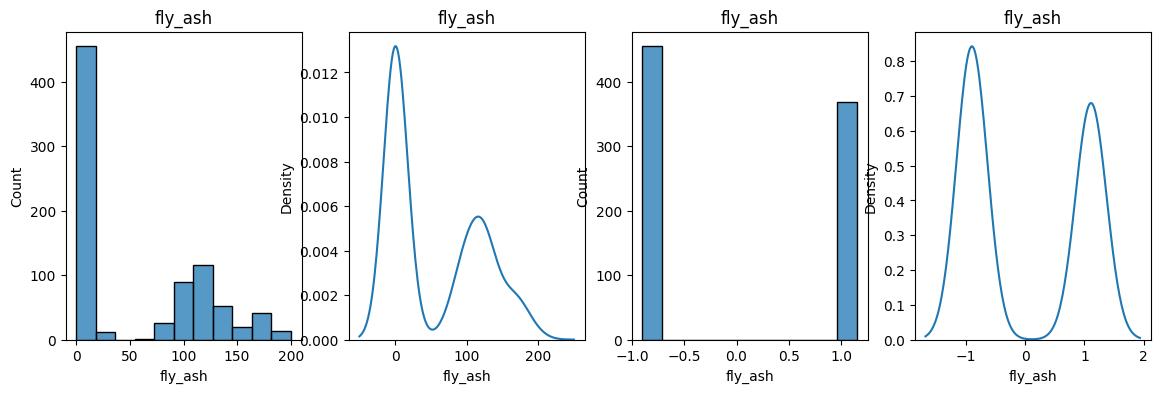

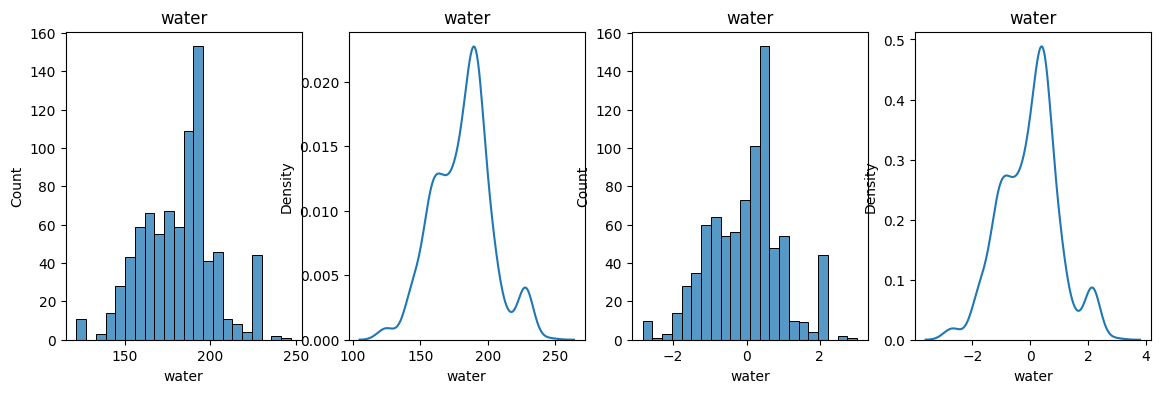

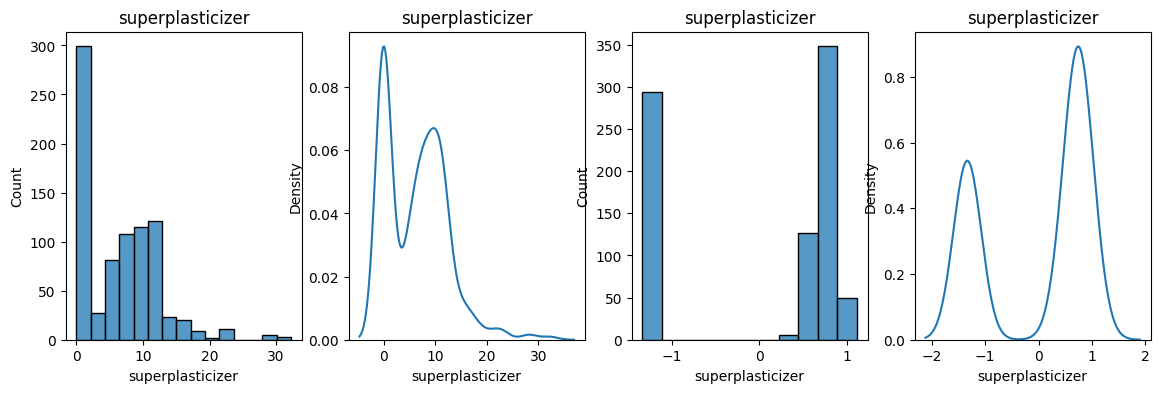

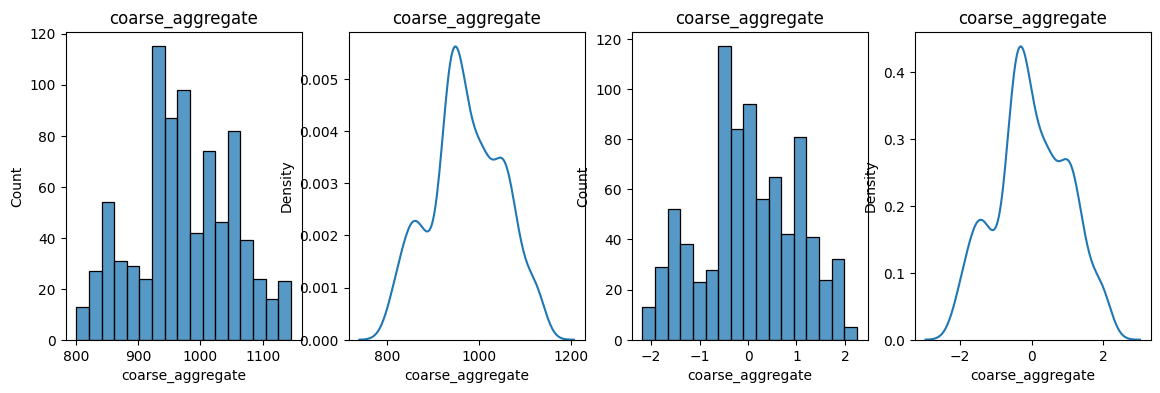

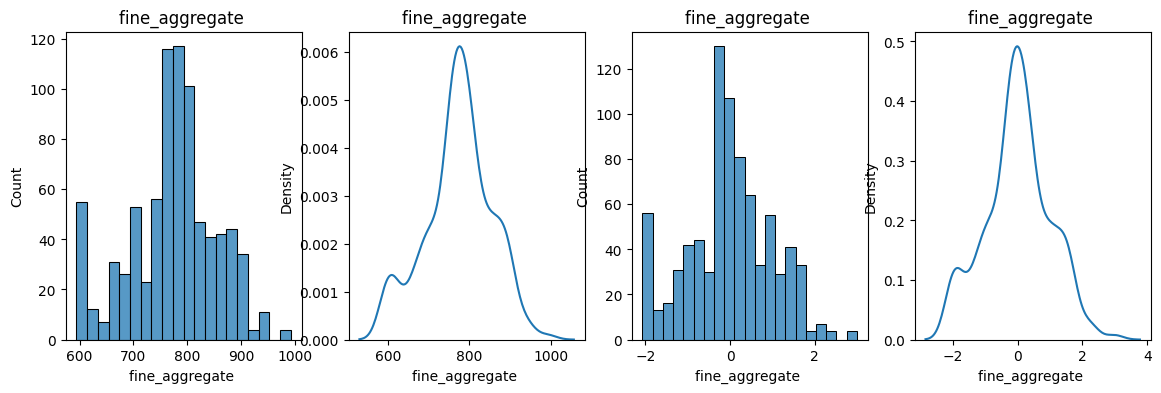

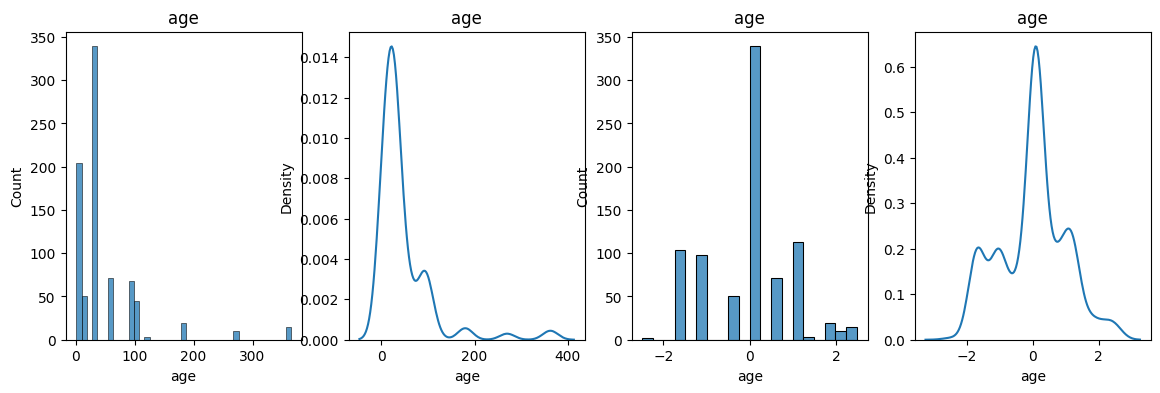

In [68]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(141)
    sns.histplot(X_train[col])
    plt.title(col)
    
    plt.subplot(142)
    sns.kdeplot(X_train[col])
    plt.title(col)

    plt.subplot(143)
    sns.histplot(X_train_transformed[col])
    plt.title(col)

    plt.subplot(144)
    sns.kdeplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

### Yeo-johnson transformation

In [69]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2, y_train)

y_pred3 = lr.predict(X_test_transformed2)

## Function transformer 

### Log transformer 

In [70]:
# example usage of a LogTransformer from sklearn
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
#import RepeatedKFold
from sklearn.model_selection import RepeatedKFold

# define the pipeline
steps = list()
steps.append(('log', FunctionTransformer(np.log1p)))
steps.append(('model', LinearRegression()))
pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='r2', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('R2: %.3f' % (score))

R2: 0.794


### Custom transformer

## Binning & Discretization

## Feature construction and Feature spliting 

## Handle categorical feature 

### Ordinal Encoding 

### OneHot Encoding 

## Handle date time feature 

## Pipeline 